## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv("./bank-additional-full.csv", sep=";")
display(dataset.head(3))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
print("Статистична інформація:")
dataset.describe()

Статистична інформація:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
print(f"Розмірність датасету: {dataset.shape}")

Розмірність датасету: (41188, 21)


**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [7]:
dataset["y"] = dataset["y"].map({'yes': 1, 'no':0}).astype(int)
bank_target = dataset[["y"]]
display(bank_target.head(3))

,y
0,0
1,0
2,0


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [8]:
bank_client = dataset[['age','job','marital','education','default','housing','loan']]
bank_client 

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


In [9]:
for column in bank_client:
        print(f"Unique values in {column}:")
        print(bank_client[column].unique())
        print("\n")

Unique values in age:
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


Unique values in job:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


Unique values in marital:
['married' 'single' 'divorced' 'unknown']


Unique values in education:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


Unique values in default:
['no' 'unknown' 'yes']


Unique values in housing:
['no' 'yes' 'unknown']


Unique values in loan:
['no' 'yes' 'unknown']




**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

In [10]:
print("Max Age: ", bank_client['age'].max())
print("Min Age: ", bank_client['age'].min())
print("NaN values: ", np.isnan(bank_client['age']).sum())

Max Age:  98
Min Age:  17
NaN values:  0


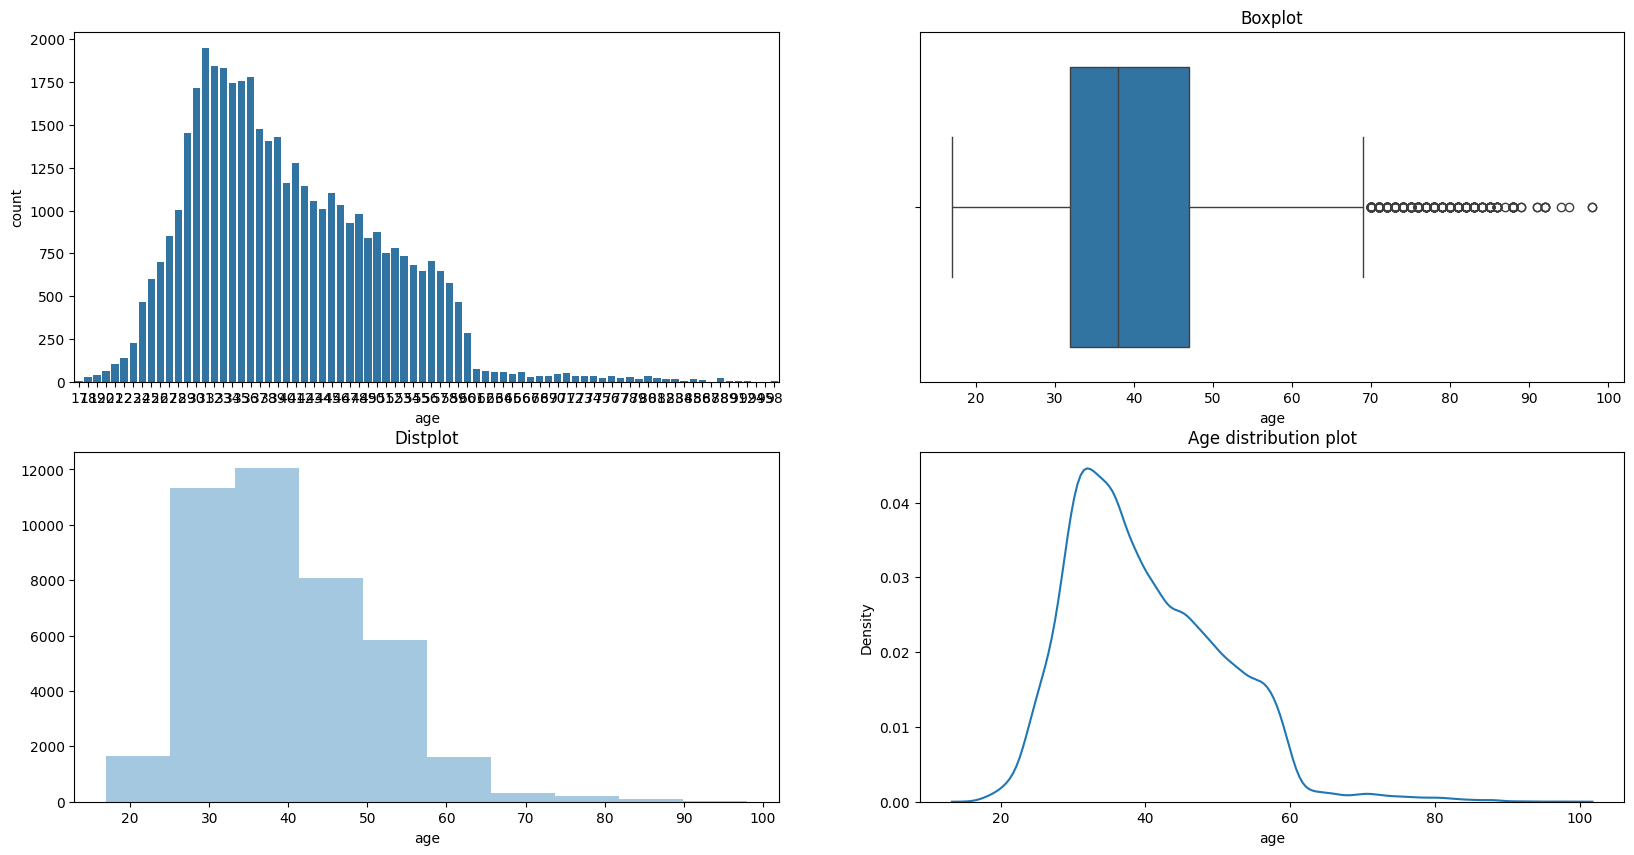

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

sns.countplot(x='age', data=bank_client, ax=ax[0][0])
ax[0][1].set_title('Countplot')

sns.boxplot(x='age', data=bank_client, ax=ax[0][1])
ax[0][1].set_title('Boxplot')

sns.distplot(bank_client['age'], ax=ax[1][0], kde=False, bins=10,  label='Histogram')
sns.kdeplot(bank_client['age'], ax=ax[1][1], label='KDE')

ax[1][0].set_title('Distplot')
ax[1][1].set_title('Age distribution plot')
plt.show()

**Висновки з 1-4 завдання (детальні)**

1.   Розмірність датасету становить 41188,21. Також у цьому завданні ми вивели статистичну інформацію по числовим змінним.

2.   Проаналізували tаrget та змінили значення на 1-так та 0-ні. Ця колонка показує нам чи оформив клієнт депозит.

3.   У цьому завданні ми визначили атрибути які характеризують клієнтів банку (age, job, marital, education, default, housing, loan) та вивели унікальні значення в кожній колонці.

4.   Проаналізували атрибут Age, максимальне значення якого 98 років, а мінімальне 17. Побудували розподіл, де можемо побачити що більшість клієнтів мають вік від 29 до 40 років. Найбільша кількість клієнтів віком 31. Судячи з боксплоту, можна сказати що меіана буде знахидитись приблизно в діапазоні 37-39 років.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [14]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    sorted_data = np.sort(df[column])
    Q1 = np.percentile(sorted_data, low_percentile)
    Q2 = dataset["age"].median()
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q2 percentile of the given data: {Q2}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1

    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - (IQR * 1.5)
    up_lim = Q3 + (IQR * 1.5)

    print('')
    print(f"Lower bound: {low_lim}")
    print('')
    print(f"Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')

    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]

    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers

In [15]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q2 percentile of the given data: 38.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

Lower bound: -12.5

Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1.   Ми визначили 10-й перцентиль (Q1) і 90-й перцентиль (Q3). Функція буде змінюватись залежно від переданих перцентилів. Згідно цього ми можемо бачити що 10 % усіх клієнтів мають вік до 28 років, а 90% до 55.

2.   Interquantile range відповідає за розміх між Q1 і Q3 квартилями. 

3.   Нижня межа дорівнює -12.5 і всі менші значення будуть рахуватись викидами. Так як число менше 0, то нижня межа буде ігноруватись. Верхня межа дорівнює 95.5, все що більше за неї буде рахуватись як викиди. 

4. Ми бачимо що викидами буде рахуватись тільки 2 рядки з усього датасету, так як є тільки 2 людини віком 98 років, що є також максимальним віком з усієї бази даних.

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

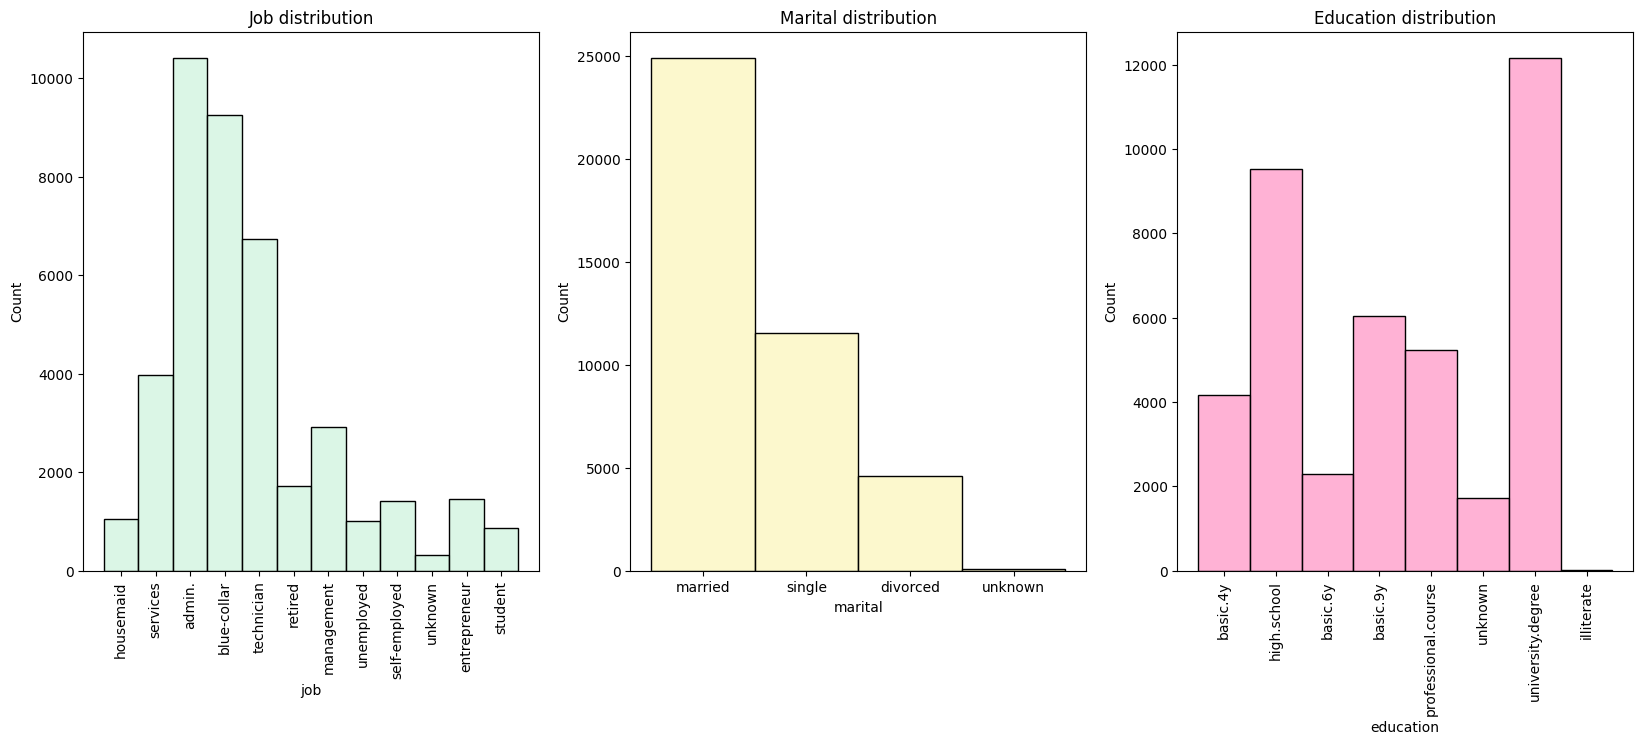

In [16]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(data=dataset, x="job", ax=ax1, color="#d0f4de")
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Job distribution")

sns.histplot(data=dataset, x="marital", ax=ax2, color="#fcf6bd")
ax2.set_title("Marital distribution")

sns.histplot(data=dataset, x="education", ax=ax3, color="#ff99c8")
ax3.tick_params(axis='x', rotation=90)
ax3.set_title("Education distribution")

plt.show()

**Висновки з завдання 6 (детальні)**

1.   job: найбільше значень у колонці admin (найбільш поширена професія), найменше у колонці unknown(дані про професію клієнта невідомі). 

2.   marital: найбільша частина клієнтів одружена, найменша розлучена (якщо не враховувати невідомі дані)

3.   education: здебільшого клієнти мають унівеститетську освіту або тільки середню.

У кожному графіку найменшу кількість значень має атрибут unknown, це означає що більшість інформації про клієнтів зареєстровано в датасеті.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

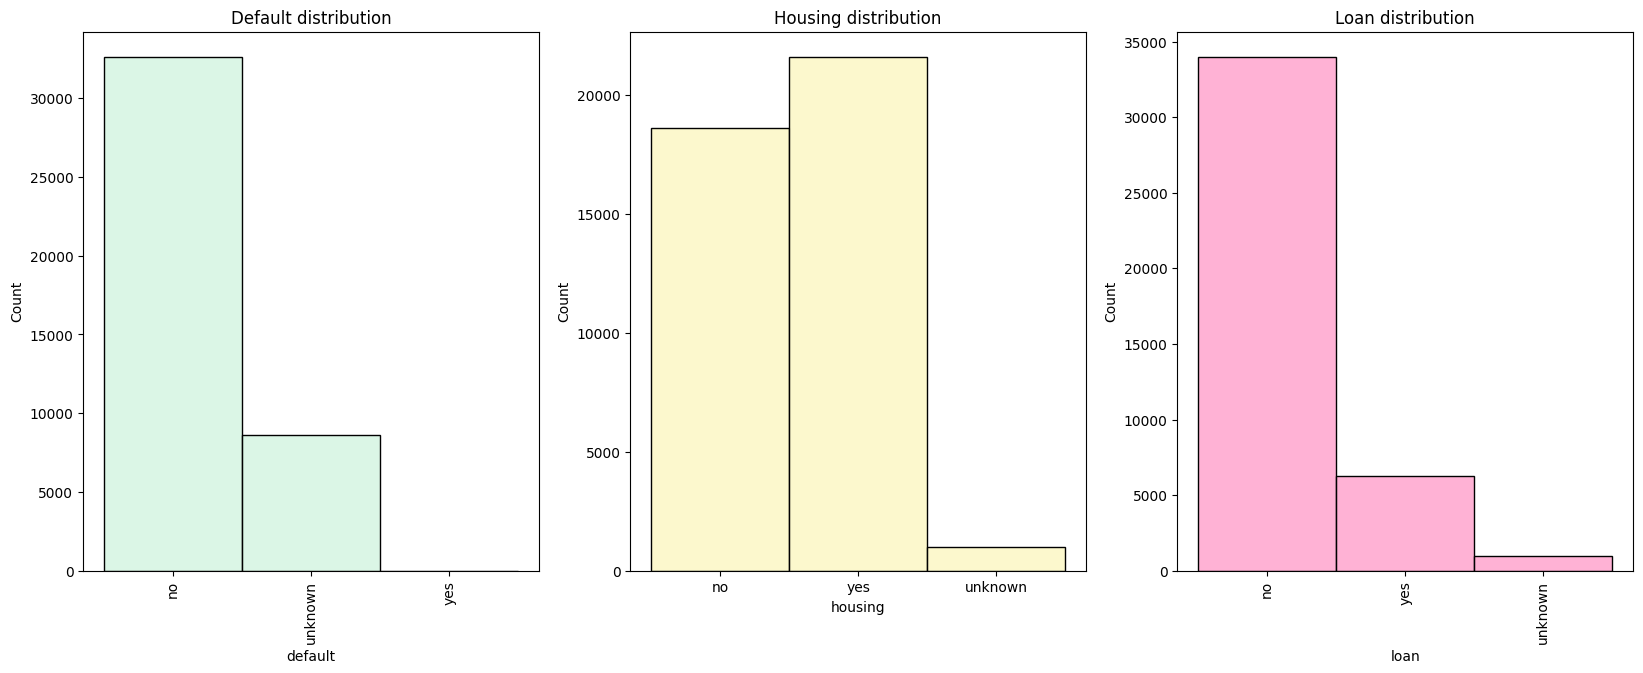

In [17]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(data=dataset, x="default", ax=ax1, color="#d0f4de")
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Default distribution")

sns.histplot(data=dataset, x="housing", ax=ax2, color="#fcf6bd")
ax2.set_title("Housing distribution")

sns.histplot(data=dataset, x="loan", ax=ax3, color="#ff99c8")
ax3.tick_params(axis='x', rotation=90)
ax3.set_title("Loan distribution")

plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [18]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = df[col].fillna('<MISSING>')
        df[col] = le.fit_transform(df[col])
    return df

In [19]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])
bank_client

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0
41184,46,1,1,5,0,0,0
41185,56,5,1,6,0,2,0
41186,44,9,1,5,0,0,0


**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [20]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
  """
  Function for encoding age column
    
  df: pd.DataFrame to encode
  age_col: age col to encode 
  """
  dataframe[age_col + '_qcut'] = pd.qcut(dataframe[age_col], 4, labels=False)
          
  return dataframe

In [21]:
bank_client = encode_age(bank_client, 'age')
print(bank_client['age_qcut'].unique())

[3 1 2 0]


**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

1. 0: вік людини входить до першого квартилю і є одним з найнижчих 25% віку в датасеті.

2. 1: вік людини належить до другого квартилю - знаходиться між 25% і 50% віку.

3. 2: вік людини входить до третього квартилю - знаходиться між 50% і 75% віку.

4. 3: вік людини належить до четвертого квартилю і він один із найвищих 25% віку в датасеті.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [22]:
bank_relat = dataset[["contact", "month", "day_of_week", "duration"]]
display(bank_relat.head(3))
bank_relat.isna().sum()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226


contact        0
month          0
day_of_week    0
duration       0
dtype: int64

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [23]:
for column in bank_relat:
    if column not in ['duration']:
        print(f"Unique values in {column}:")
        print(bank_relat[column].unique())

Unique values in contact:
['telephone' 'cellular']
Unique values in month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in day_of_week:
['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



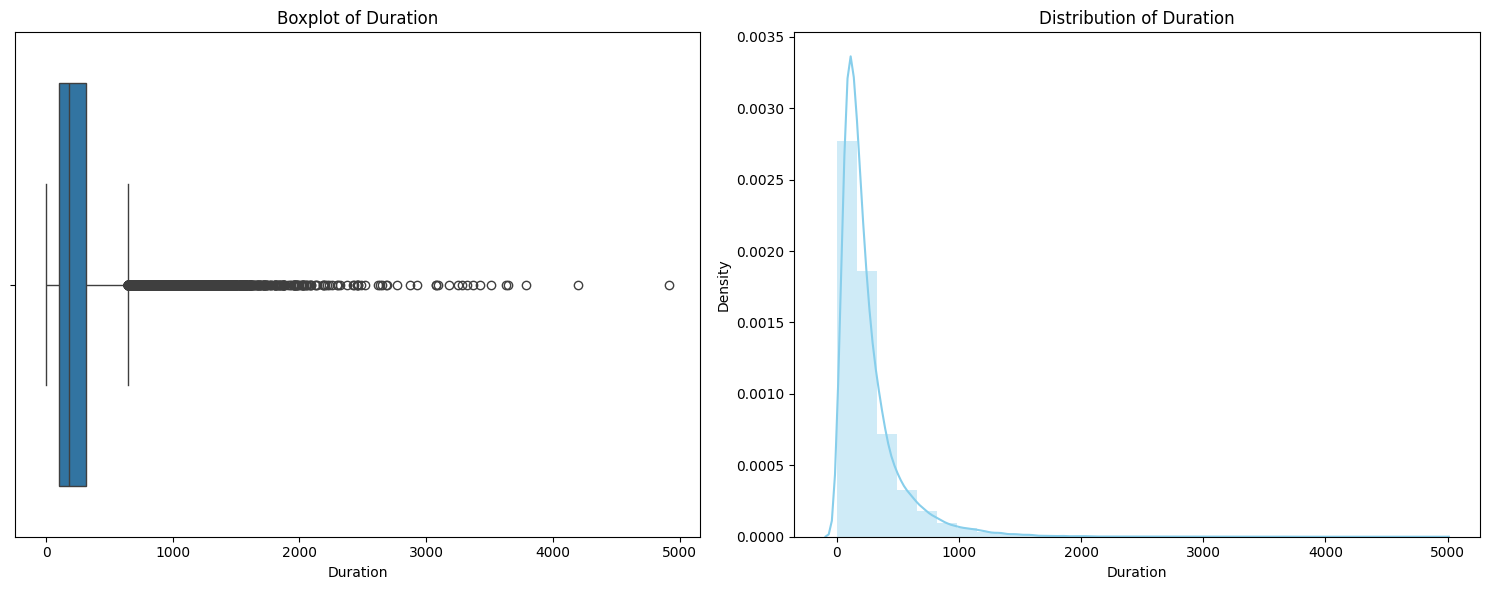

In [24]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='duration', data=dataset)
plt.title('Boxplot of Duration')
plt.xlabel('Duration')

plt.subplot(1, 2, 2)
sns.distplot(dataset['duration'], kde=True, hist=True, bins=30, color='skyblue')
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [25]:
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])
display(bank_relat.head(3))

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [26]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
  """
  Function for encoding duration column
    
  df: pd.DataFrame to encode
  duration_col: duration col to encode 
  """
  
  dataframe[duration_col + '_qcut'] = pd.qcut(dataframe[duration_col], 4, labels=False)
          
  return dataframe

In [27]:
bank_relat = encode_duration(bank_relat, 'duration')
display(bank_relat.head(3))
bank_relat.isnull().sum()

,contact,month,day_of_week,duration,duration_qcut
0,1,6,1,261,2
1,1,6,1,149,1
2,1,6,1,226,2


contact          0
month            0
day_of_week      0
duration         0
duration_qcut    0
dtype: int64

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [28]:
bank_socec = dataset[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
bank_socec

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...
41183,-1.1,94.767,-50.8,1.028,4963.6
41184,-1.1,94.767,-50.8,1.028,4963.6
41185,-1.1,94.767,-50.8,1.028,4963.6
41186,-1.1,94.767,-50.8,1.028,4963.6


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [29]:
bank_other = dataset[['campaign','pdays','previous','poutcome']]
bank_other

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent
...,...,...,...,...
41183,1,999,0,nonexistent
41184,1,999,0,nonexistent
41185,2,999,0,nonexistent
41186,1,999,0,nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [30]:
display(bank_other["poutcome"].unique().tolist())

bank_other = encode_categorical_columns(bank_other, ['poutcome'])
display(bank_other.head(3))

['nonexistent', 'failure', 'success']

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [31]:
bank_final= pd.concat([bank_client, bank_relat, bank_socec, bank_other], axis=1)
bank_final = bank_final.drop(["age"], axis="columns")

display(bank_final.head(5))

print("Пропуски:")
display(bank_final.isnull().sum())


,job,marital,education,default,housing,loan,age_qcut,contact,month,day_of_week,...,duration_qcut,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,3,1,0,0,0,0,3,1,6,1,...,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,7,1,3,1,0,0,3,1,6,1,...,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,7,1,3,0,2,0,1,1,6,1,...,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,0,1,1,0,0,0,2,1,6,1,...,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,7,1,3,0,0,2,3,1,6,1,...,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1


Пропуски:


job               0
marital           0
education         0
default           0
housing           0
loan              0
age_qcut          0
contact           0
month             0
day_of_week       0
duration          0
duration_qcut     0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
dtype: int64

**Завдання 19** Провести ділення вибірки

In [32]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [33]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final,  bank_target, 0.2, 10, 101)

In [34]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [35]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [36]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7073  206]
 [ 590  369]]
90.0


## k-NN

k=1 88.41 (+/- 0.46)
k=2 89.79 (+/- 0.55)
k=3 89.82 (+/- 0.48)
k=4 90.22 (+/- 0.45)
k=5 90.18 (+/- 0.65)
k=6 90.48 (+/- 0.57)
k=7 90.55 (+/- 0.57)
k=8 90.60 (+/- 0.46)
k=9 90.72 (+/- 0.52)
k=10 90.70 (+/- 0.53)
k=11 90.85 (+/- 0.59)
k=12 90.73 (+/- 0.60)
k=13 90.87 (+/- 0.59)
k=14 90.77 (+/- 0.57)
k=15 90.90 (+/- 0.58)
k=16 90.75 (+/- 0.56)
k=17 90.87 (+/- 0.59)
k=18 90.83 (+/- 0.52)
k=19 90.94 (+/- 0.60)
k=20 90.82 (+/- 0.47)
k=21 90.91 (+/- 0.49)
k=22 90.85 (+/- 0.48)
k=23 90.85 (+/- 0.53)
k=24 90.83 (+/- 0.50)
k=25 90.87 (+/- 0.51)
The optimal number of neighbors is 18 with 90.9%


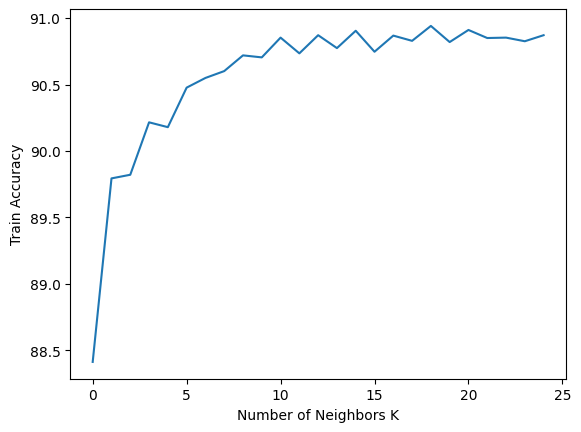

In [37]:
neighbors = np.arange(0,25)

cv_scores = []

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [38]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7131  148]
 [ 640  319]]
90.0


## Логістична Регресія

In [39]:
models = pd.DataFrame({
                'Models': ['LogisticRegression'],
                'Score':  [LOGCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,LogisticRegression,0.904105


**Висновки по моделям (детальні)**

1.   Логістична регресія: точність цієї моделі становить 90%, що є дуже високим показником. Але точність це не завжди показник хорошої моделі. Через це нам потрібно використовувати іншу модель, бо зазвичай не існує настільки точних результатів.

2.   k-NN: З цією моделлю так само, адже вона показала такий самий результат точності, як і попередня - 90%. Робимо висновок, що цю модель також не дуже нам підходить.

3. У таких випадках як у нас, потрібно більше опиратись не на точність, а на інші показники, так як вони можуть бути більш інформативними.